In [278]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 복습

In [279]:
path = ('/content/drive/MyDrive/새싹2기/python_DA/data/titanic.csv')
titan = pd.read_csv(path)
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [280]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [281]:
ms = titan.isnull().sum()

In [282]:
titan.isnull().value_counts()

survived  pclass  sex    age    sibsp  parch  fare   embarked  class  who    adult_male  deck   embark_town  alive  alone
False     False   False  False  False  False  False  False     False  False  False       True   False        False  False    530
                                                                                         False  False        False  False    182
                         True   False  False  False  False     False  False  False       True   False        False  False    158
                                                                                         False  False        False  False     19
                         False  False  False  False  True      False  False  False       False  True         False  False      2
Name: count, dtype: int64

In [283]:
ms[ms>0]

,0
age,177
embarked,2
deck,688
embark_town,2


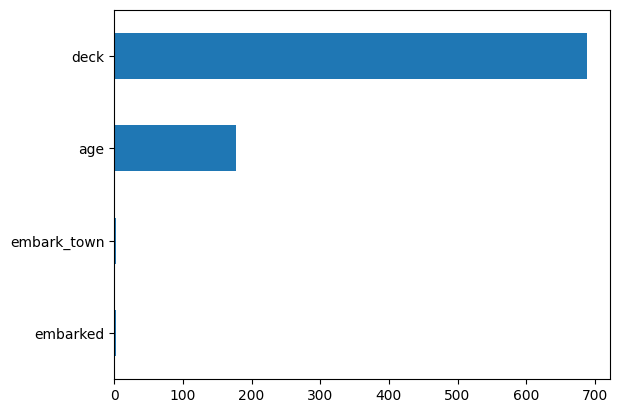

In [284]:
ms[ms>0].sort_values().plot.barh();

In [285]:
ms_cols = list(ms[ms>0].index)
ms_cols

['age', 'embarked', 'deck', 'embark_town']

In [286]:
titan[ms_cols].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [287]:
titan[ms_cols].describe(include='object')

,embarked,deck,embark_town
count,889,203,889
unique,3,7,3
top,S,C,Southampton
freq,644,59,644


판단 방향
- 판단1. 644건의 embarked, embark_town은 최빈값으로 대체해도 되겠다.
- 판단2 .2건 밖에 발생하지 않은 embarked, embark_town 은 해당 컬러럼에서 결측치가 발생한 행 자체를 없애버려도 영향이 크지 않겠다.

<Axes: ylabel='Frequency'>

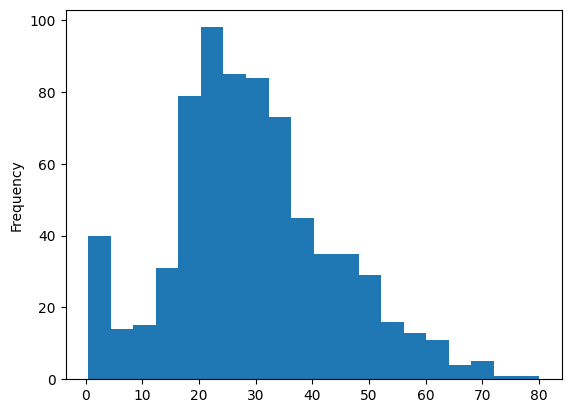

In [288]:
titan['age'].plot(kind='hist', bins= 20)

In [289]:
titan.dropna(subset=['embarked', 'embark_town'], inplace=True)
titan

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [290]:
titan['deck'].describe()

,deck
count,201
unique,7
top,C
freq,59


In [291]:
clean_t = titan.fillna({'deck':'unknown',
              'age':titan['age'].median()})
clean_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,unknown,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,unknown,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


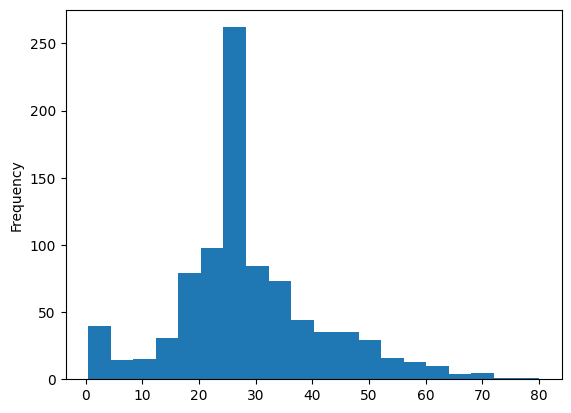

In [292]:
clean_t['age'].plot.hist(bins=20);

* 이상치 처리

In [293]:
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [294]:
titan.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


> 대소비교 불가능한 컬럼 제외 필요
1. bool형식은 제외필요 -> `adult_male`, `alone`
2. `survived` 컬럼 0/1 의 단순 구분 -> 제외 필요
3. `pclass` 컬럼 -> Frist(1), Second(2), Third(3) -> 1보다 3이 큰가?

In [295]:
titan.select_dtypes(exclude='object') #object 타입 제외

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,3,22.0,1,0,7.2500,True,False
1,1,1,38.0,1,0,71.2833,False,False
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,False
4,0,3,35.0,0,0,8.0500,True,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True
887,1,1,19.0,0,0,30.0000,False,True
888,0,3,NaN,1,2,23.4500,False,False
889,1,1,26.0,0,0,30.0000,True,True


In [296]:
ol_cols = ['age','sibsp','parch','fare']
ol_cols

['age', 'sibsp', 'parch', 'fare']

<Axes: >

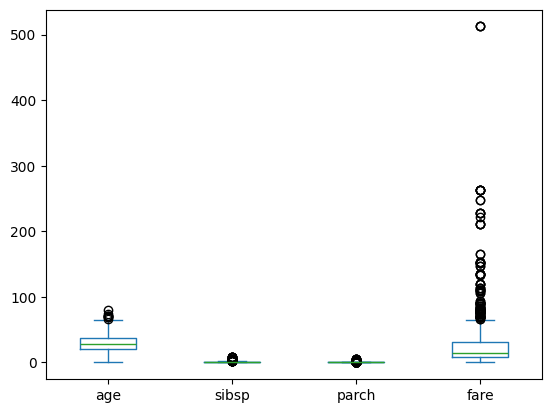

In [297]:
titan[ol_cols].plot.box()

In [298]:
titan['fare'].describe()

,fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


<Axes: >

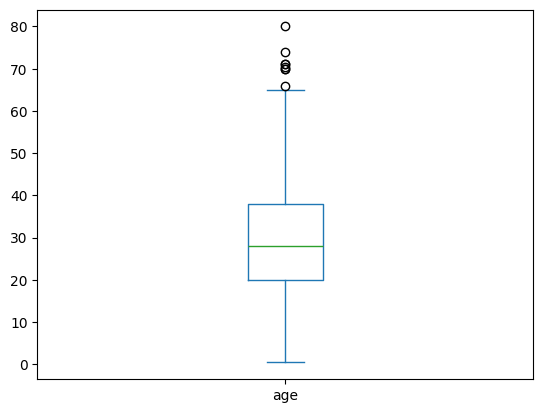

In [299]:
titan['age'].plot.box()

<Axes: >

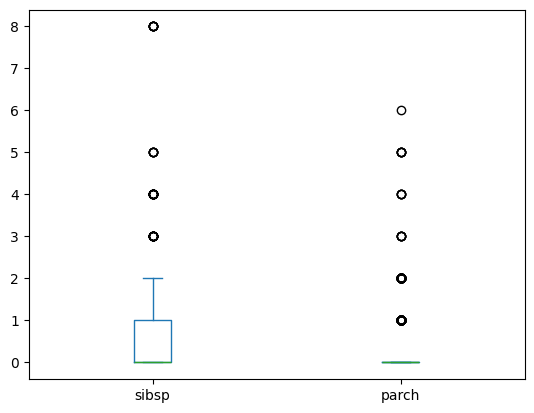

In [300]:
titan[['sibsp','parch']].plot.box() # 이산형처럼 보임, 이상치가 매우 두드러짐

In [301]:
titan['parch'].value_counts()

,count
parch,
0,676
1,118
2,80
5,5
3,5
4,4
6,1


- `sibsp`, `parch` : 이산형, 충분히 있을 수 있는 케이스
    - 형제자매,배우자의 수 8명 이상 대가족이 발생할 수 없는 케이스인가 -> 🙅
    - 부모,자식의 수가 5~6명 발생할 수 없는 케이스인가?  -> 🙅
- `age` : 연속형, 충분히 있을 수 있는 케이스
    - 나이 80살 이상이 논리적으로 발생할 수 없는가 -> 🙅

세 컬럼의 이상치는 없다고 평가하고, 처리하지 않겠다.

이상치 평가 결과,
- `fare`에 대한 이상치 처리 필요

이상치 처리전략
1. 삭제: drop메서드
2. 대체: 선택 + 할당
3. 유지

In [302]:
titan[titan['fare']>=500]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [303]:
# 이상치가 포착되는 행 삭제
fare_out = titan[titan['fare']>=500].index
fare_out

Index([258, 679, 737], dtype='int64')

In [304]:
cleaned = titan.drop(index=fare_out)

In [305]:
Q1 = titan['fare'].quantile(0.25)
Q3 = titan['fare'].quantile(0.75)
IQR =Q3 - Q1

lower = Q1 -1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(-26.7605), np.float64(65.6563))

In [306]:
clean_idx = titan[(titan['fare']<lower)| (titan['fare']>upper)].index
titan.drop(index = clean_idx)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

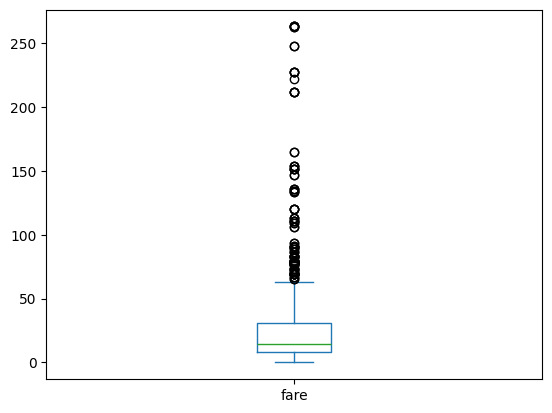

In [307]:
cleaned['fare'].plot.box()

# [2] 문자열 처리

In [308]:
data =  {
    'Names': ['John Doe  ', '  Jane Smith', 'Alice Johnson  ', 'Chris Lee'],
    'Email': ['JOHNDOE@example.com', 'janesmith@example.com', 'AliceJ@example.com', 'ChrisL@example.net']
}
df = pd.DataFrame(data)

In [309]:
df

,Names,Email
0,John Doe,JOHNDOE@example.com
1,Jane Smith,janesmith@example.com
2,Alice Johnson,AliceJ@example.com
3,Chris Lee,ChrisL@example.net


In [310]:
df.dtypes

,0
Names,object
Email,object


## (1) 문자열 처리

In [311]:
# 처리를 마친 새로운 시리즈를 반환

# 소문자 변환
df['Names'].str.lower()

,Names
0,john doe
1,jane smith
2,alice johnson
3,chris lee


In [312]:
# 대문자 변환
df['Names'].str.upper()

,Names
0,JOHN DOE
1,JANE SMITH
2,ALICE JOHNSON
3,CHRIS LEE


In [313]:
df['Names'].str.capitalize()

# jane 은 왜 처리가 안되나? 이름 앞에 공백이 있어서 처리가 안

,Names
0,John doe
1,jane smith
2,Alice johnson
3,Chris lee


In [314]:
# 공백 제거
df['Names'] = df['Names'].str.strip()

In [315]:
df['Names'].str.capitalize()

,Names
0,John doe
1,Jane smith
2,Alice johnson
3,Chris lee


In [316]:
# 포함 여부/패턴확인
df['Email'].str.contains('example.com')

,Email
0,True
1,True
2,True
3,False


In [317]:
# True / False의 시리즈를 바탕으로, True인 행만 선택하여 확인
df[df['Email'].str.contains('example.com')]

,Names,Email
0,John Doe,JOHNDOE@example.com
1,Jane Smith,janesmith@example.com
2,Alice Johnson,AliceJ@example.com


In [318]:
df['Email'].str.replace('example', 'demo')

,Email
0,JOHNDOE@demo.com
1,janesmith@demo.com
2,AliceJ@demo.com
3,ChrisL@demo.net


In [319]:
df['Email'].map({'com':'co.kr'}) # 작동 하지 않음 - 완벽히 일치해야 함 + map 함수가 replace에 없음

,Email
0,NaN
1,NaN
2,NaN
3,NaN


In [320]:
df['Email'].str.split('@')

,Email
0,"[JOHNDOE, example.com]"
1,"[janesmith, example.com]"
2,"[AliceJ, example.com]"
3,"[ChrisL, example.net]"


In [321]:
# 특정 구분자를 통해 분할, 데이터프레임을 새로운 열로 할당
# 언제 사용할까? 데이터 전처리
df[['user_id', 'domain']] = df['Email'].str.split('@', expand=True)
df

,Names,Email,user_id,domain
0,John Doe,JOHNDOE@example.com,JOHNDOE,example.com
1,Jane Smith,janesmith@example.com,janesmith,example.com
2,Alice Johnson,AliceJ@example.com,AliceJ,example.com
3,Chris Lee,ChrisL@example.net,ChrisL,example.net


In [322]:
data = {
    'CustomerID': range(10),
    'Rating':[4,5,3,2,4,1,4,5,3,4],
    'Satisfaction': ['Satisfied', 'Very Satisfied', 'Neutral', 'Unsatisfied', 'Satisfied',
                     'Very Unsatisfied','Satisfied', 'Very Satisfied', 'Neutral','Satisfied']
}
df= pd.DataFrame(data)

In [323]:
df.dtypes

,0
CustomerID,int64
Rating,int64
Satisfaction,object


In [324]:
df['Sat_cat'] = pd.Categorical(df['Satisfaction'], categories=['Very Unsatisifed','Unsatisfied',
                           'Neutral','Satisfied','Very Satisfied'],
               ordered=True)

In [325]:
df['Sat_cat']

,Sat_cat
0,Satisfied
1,Very Satisfied
2,Neutral
3,Unsatisfied
4,Satisfied
5,NaN
6,Satisfied
7,Very Satisfied
8,Neutral
9,Satisfied


<Axes: xlabel='Sat_cat'>

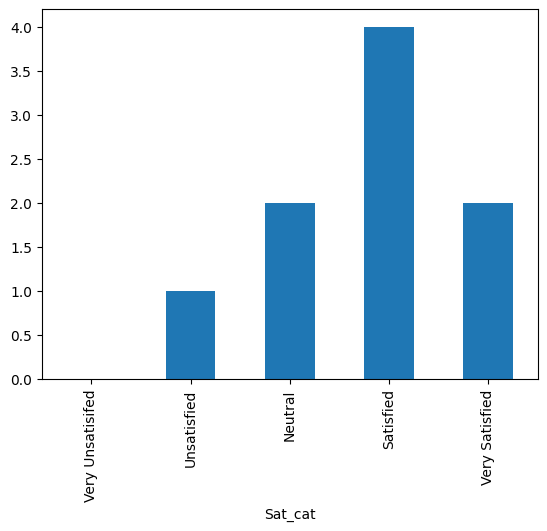

In [326]:
df['Sat_cat'].value_counts(sort=False).plot.bar()

In [327]:
print(df['Sat_cat'])

0         Satisfied
1    Very Satisfied
2           Neutral
3       Unsatisfied
4         Satisfied
5               NaN
6         Satisfied
7    Very Satisfied
8           Neutral
9         Satisfied
Name: Sat_cat, dtype: category
Categories (5, object): ['Very Unsatisifed' < 'Unsatisfied' < 'Neutral' < 'Satisfied' < 'Very Satisfied']


> 특징
1. 카테고리가 기존의 되어있는 값들만 들어올 수 있고,
2. pd.Categorical로 범주형 변수로 만들 때, 카테고리 외의 값은 아예 결측 처리 => 사용자 수정 단에서 경고를 줄 수 있다.

In [328]:
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [329]:
titan.select_dtypes(include='object')

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,NaN,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,NaN,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,NaN,Southampton,no
...,...,...,...,...,...,...,...
886,male,S,Second,man,NaN,Southampton,no
887,female,S,First,woman,B,Southampton,yes
888,female,S,Third,woman,NaN,Southampton,no
889,male,C,First,man,C,Cherbourg,yes


In [330]:
titan['sex'] = titan['sex'].str.replace('femail','F')
titan['sex'] = titan['sex'].str.replace('mail','M')

In [331]:
pd.Categorical(titan['sex'])

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'female', 'male', 'male']
Length: 889
Categories (2, object): ['female', 'male']

In [332]:
titan['sex_cat'] = pd.Categorical(titan['sex'])

In [333]:
titan['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [334]:
titan['class_cat']= pd.Categorical(titan['class'],
               categories = ['First', 'Second', 'Third'][::-1],ordered=True)

<Axes: ylabel='class_cat'>

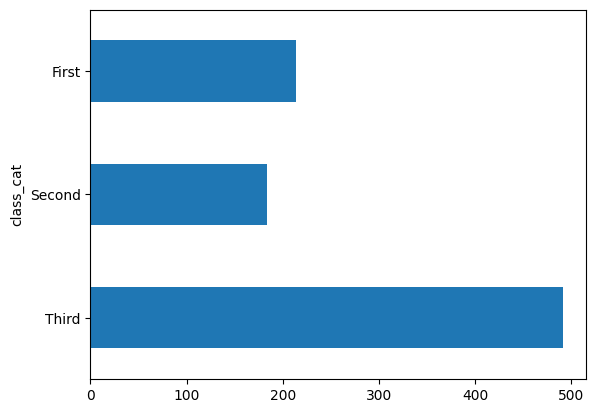

In [335]:
titan['class_cat'].value_counts(sort=False).plot.barh()

<Axes: ylabel='count'>

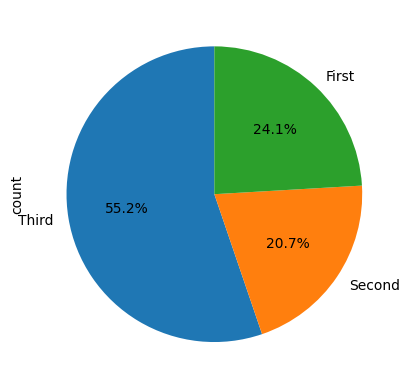

In [336]:
titan['class_cat'].value_counts(sort=False).plot.pie(startangle=90, autopct = '%1.1f%%')

## (2) 전처리 실습

In [337]:
path = ('/content/drive/MyDrive/새싹2기/python_DA/data/preprocess_tips.csv')
tips = pd.read_csv(path)
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,53,9.94,1.56,Male,False,Sun,Dinner Dinner,2
1,148,9.78,NaN,Male,False,Thur,Lunch Lunch,2
2,43,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
3,178,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
4,30,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [338]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         220 non-null    float64
 3   sex         220 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [339]:
tips.shape

(244, 8)

- 결측치 확인하고, 결측치를 처리하세요.

In [340]:
tips.isnull().sum()

,0
Unnamed: 0,0
total_bill,0
tip,24
sex,24
smoker,0
day,0
time,0
size,0


In [341]:
tips['tip'].describe()

,tip
count,220.000000
mean,3.033227
std,1.418814
min,1.000000
25%,2.000000
50%,3.000000
75%,3.720000
max,10.000000


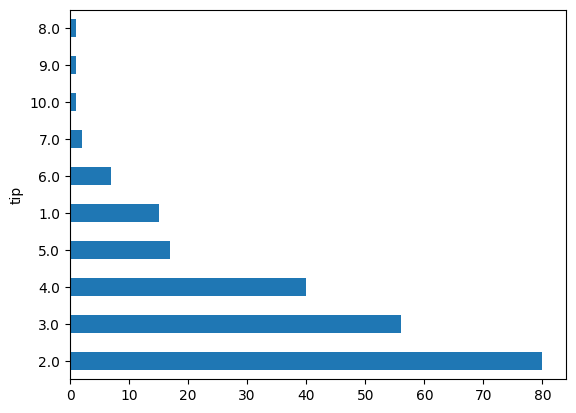

In [342]:
a = tips['tip'].round(0).value_counts().plot.barh()

In [343]:
tips['tip']=tips['tip'].fillna(2)

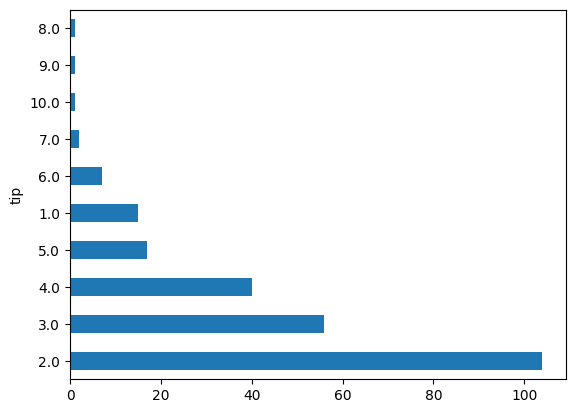

In [344]:
a = tips['tip'].round(0).value_counts().plot.barh()

<Axes: xlabel='total_bill', ylabel='tip'>

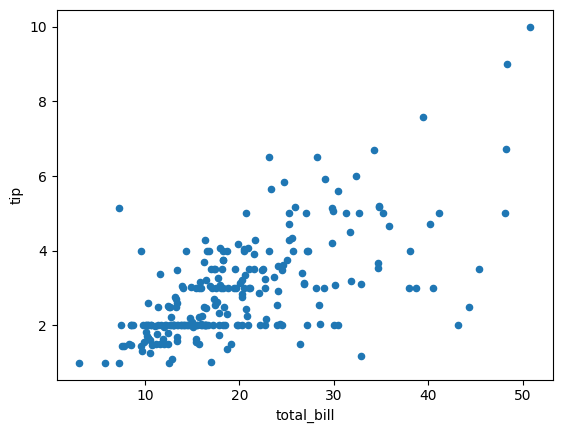

In [345]:
tips.plot.scatter(x= 'total_bill', y='tip')

In [346]:
tips['sex'] = tips['sex'].fillna('Unknown')

<Axes: ylabel='count'>

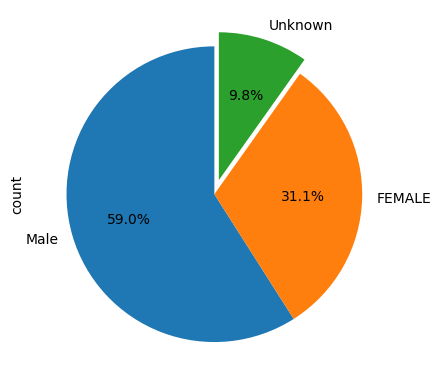

In [347]:
tips['sex'].value_counts().plot.pie(startangle=90, autopct = '%1.1f%%', explode = [0,0,0.1])

- 데이터 타입을 확인하고, day 컬럼을 category 데이터 타입으로 변경해 보세요.

In [348]:
tips.dtypes

,0
Unnamed: 0,int64
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [349]:
tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [350]:
tips['day'] = pd.Categorical(tips['day'], categories=['Thur','Fri','Sat','Sun'])
tips['day'].dtypes

CategoricalDtype(categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, categories_dtype=object)

- 범주형 데이터를 확인해 보고, 이를 올바르게 처리해 보세요. (sexsmokertime 컬럼 확인)

In [351]:
tips[['sex','smoker','time']].dtypes

,0
sex,object
smoker,object
time,object


In [352]:
tips[['sex','smoker','time']].drop_duplicates()

,sex,smoker,time
0,Male,False,Dinner Dinner
1,Male,False,Lunch Lunch
2,Unknown,False,Dinner Dinner
3,FEMALE,Yes,Dinner Dinner
6,Male,Yes,Lunch Lunch
8,Unknown,False,Lunch Lunch
9,FEMALE,False,Lunch Lunch
10,Male,Yes,Dinner Dinner
13,FEMALE,False,Dinner Dinner
14,Unknown,Yes,Dinner Dinner


In [353]:
tips['sex'] = tips['sex'].str.capitalize()
tips['sex'].head(3)

,sex
0,Male
1,Male
2,Unknown


In [354]:
tips['smoker'] = tips['smoker'].str.replace('Yes', 'True')
tips['smoker'].head(4)

,smoker
0,False
1,False
2,False
3,True


In [355]:
tips['time'] = tips['time'].str.split().map(lambda x:x[0])

In [356]:
tips['time'].str.split(' ',expand=True)[0]
tips['time'].drop_duplicates()

,time
0,Dinner
1,Lunch


- 성별을 나타내는 컬럼의 이름을 gender로 변경하고, 시각화를 통해 남/녀의 비율을 확인해 보세요.

In [357]:
rename = tips.rename({'sex':'gender'}, axis = 1)
rename

,Unnamed: 0,total_bill,tip,gender,smoker,day,time,size
0,53,9.94,1.56,Male,False,Sun,Dinner,2
1,148,9.78,2.00,Male,False,Thur,Lunch,2
2,43,9.68,1.32,Unknown,False,Sun,Dinner,2
3,178,9.60,4.00,Female,True,Sun,Dinner,2
4,30,9.55,1.45,Male,False,Sat,Dinner,2
...,...,...,...,...,...,...,...,...
239,51,10.29,2.60,Female,False,Sun,Dinner,2
240,10,10.27,1.71,Male,False,Sun,Dinner,2
241,226,10.09,2.00,Female,True,Fri,Lunch,2
242,82,10.07,1.83,Female,False,Thur,Lunch,1


In [358]:
rename['gender'].value_counts(normalize=True)

,proportion
gender,
Male,0.590164
Female,0.311475
Unknown,0.098361


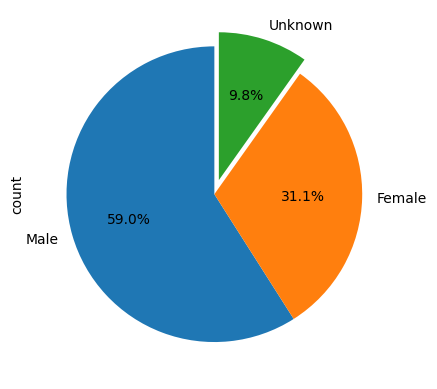

In [359]:
rename['gender'].value_counts().plot.pie(startangle =90, autopct = '%1.1f%%', explode= [0,0,0.1]);

신규 컬럼 추가
- tip 컬럼을 기준으로  다음 기준의 tip_level 컬럼을 생성하세요

In [360]:
def mapping(tip):
  if tip <3:
    return 'Low'
  elif 3<= tip < 6:
    return 'Medium'
  else:
    return 'High'

In [361]:
tips['tip_level'] = tips['tip'].map(mapping)
tips[['tip','tip_level']]

,tip,tip_level
0,1.56,Low
1,2.00,Low
2,1.32,Low
3,4.00,Medium
4,1.45,Low
...,...,...
239,2.60,Low
240,1.71,Low
241,2.00,Low
242,1.83,Low


In [362]:
tips['tip_ratio'] = round(tips['tip']/tips['total_bill'], 2)
tips[['total_bill', 'tip','tip_ratio']]

,total_bill,tip,tip_ratio
0,9.94,1.56,0.16
1,9.78,2.00,0.20
2,9.68,1.32,0.14
3,9.60,4.00,0.42
4,9.55,1.45,0.15
...,...,...,...
239,10.29,2.60,0.25
240,10.27,1.71,0.17
241,10.09,2.00,0.20
242,10.07,1.83,0.18


In [363]:
tips[['total_bill', 'tip','tip_ratio']]

,total_bill,tip,tip_ratio
0,9.94,1.56,0.16
1,9.78,2.00,0.20
2,9.68,1.32,0.14
3,9.60,4.00,0.42
4,9.55,1.45,0.15
...,...,...,...
239,10.29,2.60,0.25
240,10.27,1.71,0.17
241,10.09,2.00,0.20
242,10.07,1.83,0.18


이상치 처리
- 박스 플롯을 그려 이상치를 시각적으로 확인하세요.

<Axes: >

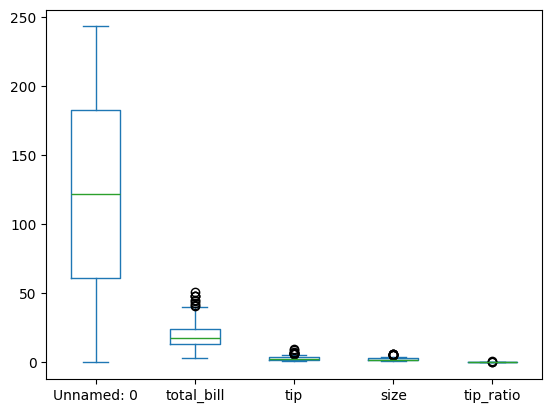

In [364]:
tips.plot.box()

사분위 범위(IQR)를 기준으로 이상치를 처리하는 함수를 만들어 보세요.

In [365]:
def get_outlier(df, column, weight):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - weight * IQR
  upper = Q3 + weight * IQR

  outlier = df.loc[(df[column] > upper ) | (df[column] < lower), :].index

  return outlier

1.0 IQR을 기준으로 total_bill 컬럼의 이상치를 식별하고, 이에 해당하는 데이터는 삭제해 주세요.

In [366]:
idx = get_outlier(tips, 'total_bill', 1.0)

In [367]:
# tips.drop(idx, axis=0, inplace=True)
tips['total_bill']

,total_bill
0,9.94
1,9.78
2,9.68
3,9.60
4,9.55
...,...
239,10.29
240,10.27
241,10.09
242,10.07


In [368]:
tips['total_bill'].reset_index(drop=True)

,total_bill
0,9.94
1,9.78
2,9.68
3,9.60
4,9.55
...,...
239,10.29
240,10.27
241,10.09
242,10.07


total_bill의 이상치를 제거한 전/후로  다음 값들을 비교해 보세요.
- 평균
- 중앙값
- 분포

이상치 제거 전

In [369]:
print(rename['total_bill'].mean())
print(rename['total_bill'].median())
print(rename['total_bill'].var())

19.78594262295082
17.795
79.25293861397827


이상치 제거 후

In [370]:
print(tips['total_bill'].mean())
print(tips['total_bill'].median())
print(tips['total_bill'].var())

19.78594262295082
17.795
79.25293861397827


결측치가 남아 있는가?

In [371]:
tips.isnull().sum()

,0
Unnamed: 0,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
tip_level,0
tip_ratio,0


범주형 컬럼이 명확한가?

In [372]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  244 non-null    int64   
 1   total_bill  244 non-null    float64 
 2   tip         244 non-null    float64 
 3   sex         244 non-null    object  
 4   smoker      244 non-null    object  
 5   day         244 non-null    category
 6   time        244 non-null    object  
 7   size        244 non-null    int64   
 8   tip_level   244 non-null    object  
 9   tip_ratio   244 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 17.7+ KB


파생 컬럼이 의도대로 생성되었는가?

In [373]:
# tips.drop('ratio', axis=1, inplace=True)
tips.head(1)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_level,tip_ratio
0,53,9.94,1.56,Male,False,Sun,Dinner,2,Low,0.16
